<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/competitions/Spaceship-Titanic/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## (1) EDA 탐색적 데이터 분석

In [3]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


타겟 레이블은 분포가 고른 편

In [44]:
train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

- 데이터 타입
    - 원핫인코딩 필요 : homeplanet, destination,
    - true, false가 string 형이어서 1, 0으로 바꿔주기
- 제거할 피처
    - name

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


통계 요약 확인하기
- age에 0살이 있음 -> '아기'를 뜻하는 것인지 확인 -> 미국에서는 태어나면서 0살

In [18]:
train.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [19]:
train[train['Age']==0].shape

(178, 14)

살짝 왼쪽으로 치우친듯한 분포 -> 로그 변환 사용하기

<Axes: >

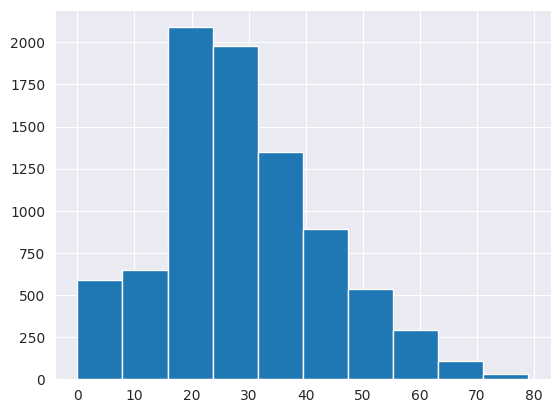

In [28]:
train['Age'].hist()

null 값 확인

In [30]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

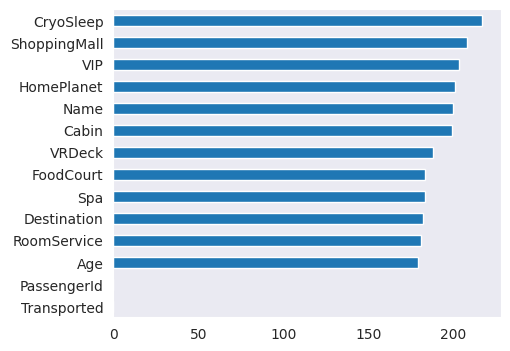

In [34]:
ax = train.isna().sum().sort_values(ascending=False)[:15][::-1].plot(kind='barh', figsize=(5, 4))

중복 확인

In [36]:
train.duplicated().any()

False

VIP가 아닌 승객이 대부분임

In [43]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

서로 연관된 피처들
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
- 많이 사용할 수록 결국 VIP에 가까운 것인지 확인해서, 데이터 단순화 시킬 수 있으면 하기

상관관계 체크
- 생각보다 럭셔리한 서비스 지불 금액과 상관관계가 있는 것을 확인

<ipython-input-46-44b5a556fb78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top20_corrs = abs(df.corr()[target_name]).sort_values(ascending=False).head(20)


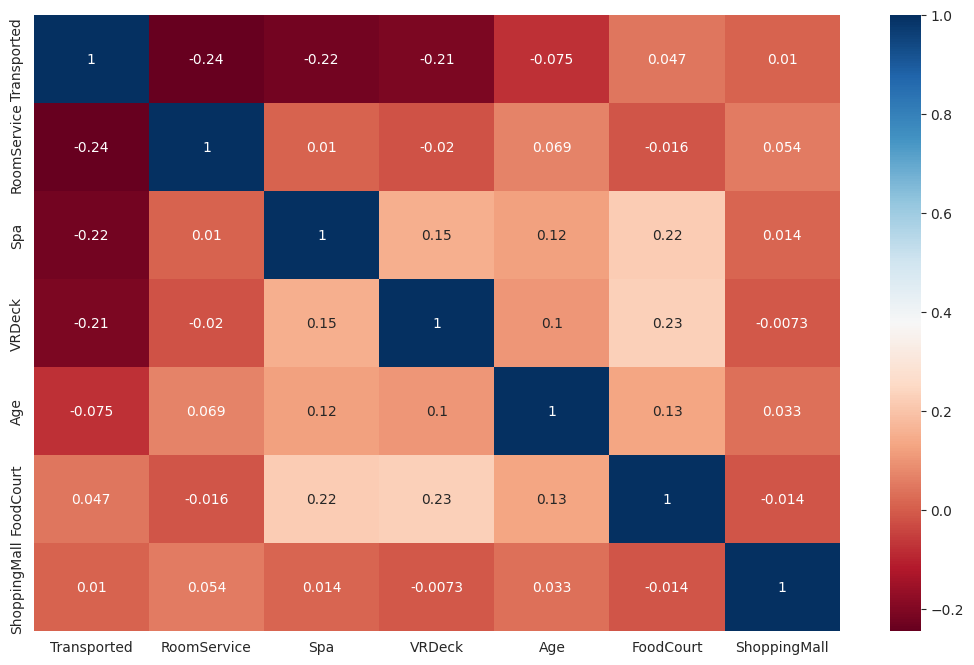

In [46]:
def top_20_corr(df, target_name):
    top20_corrs = abs(df.corr()[target_name]).sort_values(ascending=False).head(20)
    corr = train[list(top20_corrs.index)].corr()
    plt.figure(figsize=(13, 8))
    sns.heatmap(corr, cmap='RdBu', annot=True)

top_20_corr(train, 'Transported')